In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Select 5 random images from the training set
num_samples = 5
indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
original_images = x_train[indices]

In [14]:
# Function to plot images in a row
def plot_images(images, title):
    plt.figure(figsize=(16, 2))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=20)
    plt.show()

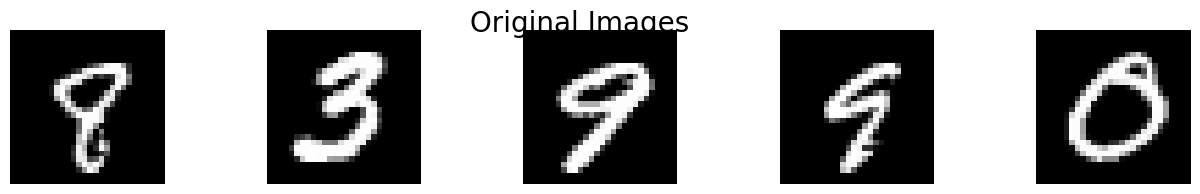

In [15]:
# Plot original images
plot_images(original_images, title='Original Images')

In [16]:
# Set up the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=45,         # Randomly rotate images by 0 to 15 degrees
    width_shift_range=0.4,     # Randomly translate images horizontally by 0 to 10%
    height_shift_range=0.4,    # Randomly translate images vertically by 0 to 10%
    shear_range=0.4,           # Shear transformations
    zoom_range=0.4,            # Zoom in/out by 10%
    horizontal_flip=False,     # Horizontal flip is not applicable for MNIST digits
    fill_mode='nearest'        # Fill mode for new pixels
)

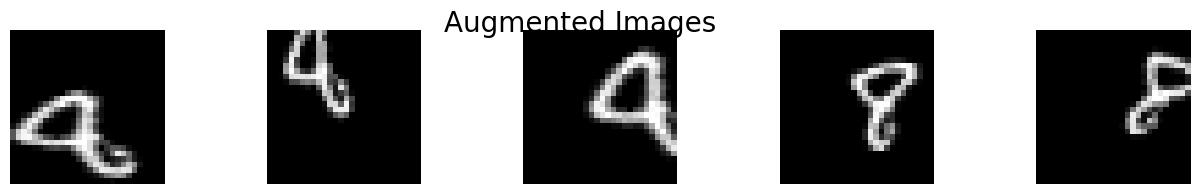

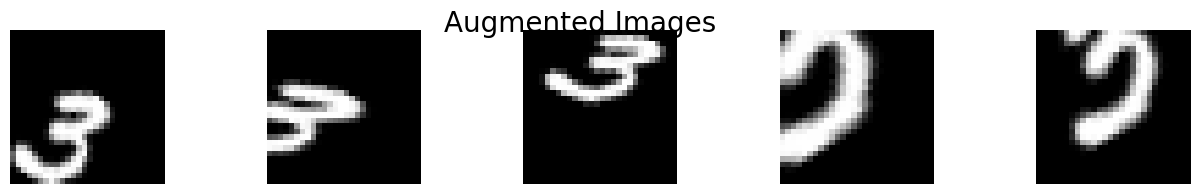

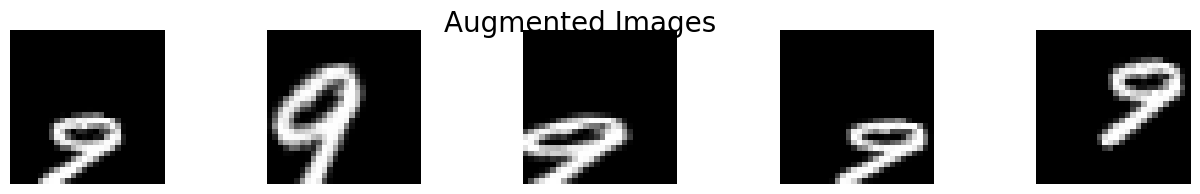

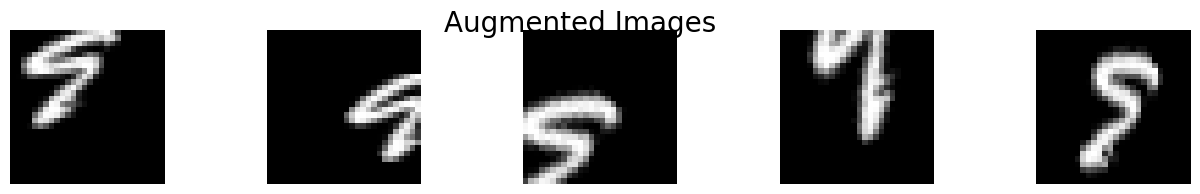

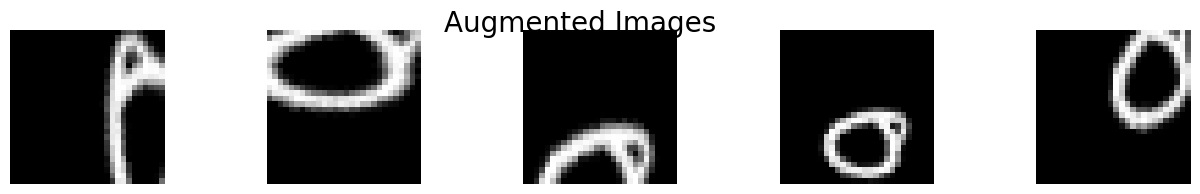

In [17]:
# Generate and plot augmented images
for original_image in original_images:
    original_image = original_image.reshape((1, 28, 28, 1))  # Reshape to (1, 28, 28, 1)
    augmented_images = [datagen.flow(original_image, batch_size=1).next()[0].reshape((28, 28)) for i in range(5)]
    plot_images(augmented_images, title='Augmented Images')


#### apply data augmentation to an image

In [11]:
import numpy as np, os, random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [12]:
# Path to the image folder
image_folder = "D:/AI-DATASETS/02-MISC-large/keras/datasets/cats-dogs-data-LARGE/train/training_data"

In [13]:
# List all files in the folder
image_files = os.listdir(image_folder)

In [14]:
# Randomly select an image file
random_image_file = random.choice(image_files)

In [15]:
image_path = os.path.join(image_folder, random_image_file)

In [16]:
# Load the image
img = load_img(image_path)  # Load image as PIL object
img_array = img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [18]:
# Generate augmented images
augmented_images = datagen.flow(img_array, batch_size=1)

In [21]:
# Number of augmented images to generate
num_augmented_images = 9

In [22]:
# Collect augmented images
augmented_batches = [next(augmented_images) for _ in range(num_augmented_images)]

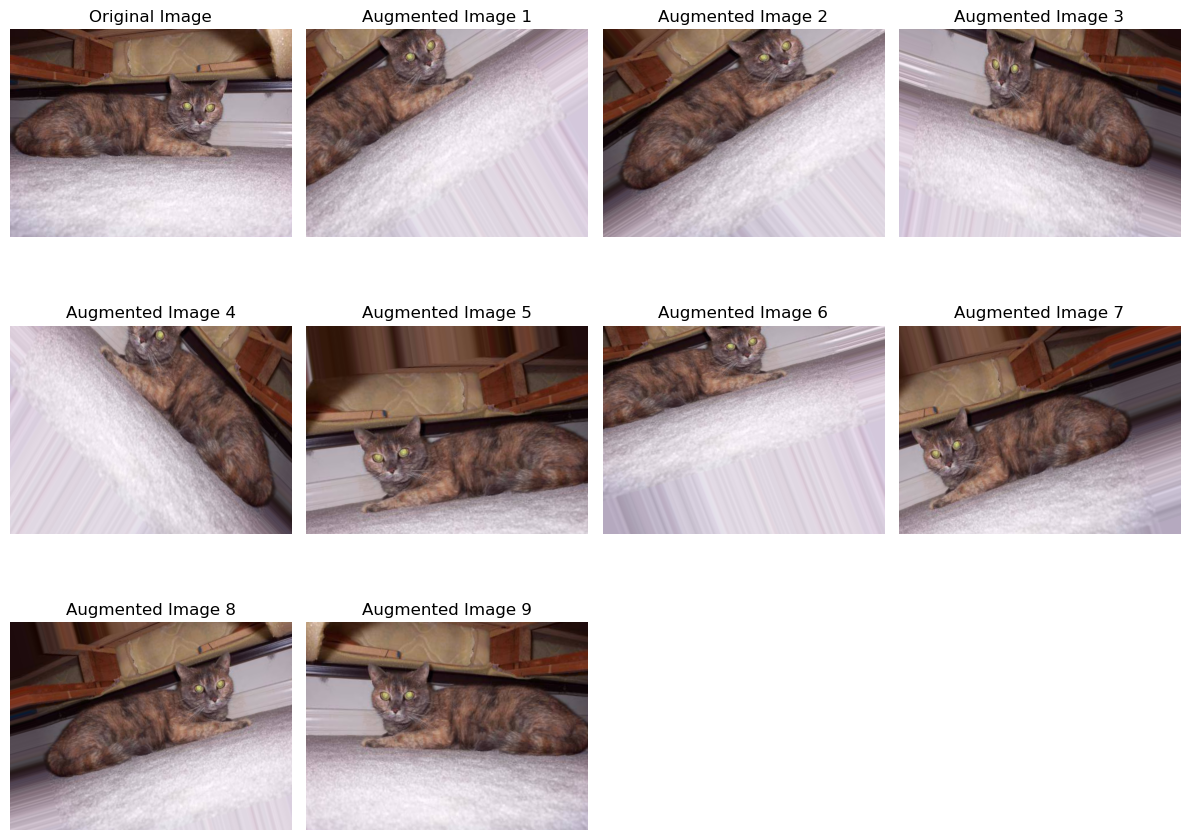

In [23]:
# Plot the original and augmented images
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(4, 4, 1)
plt.imshow(img_array[0].astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Plot augmented images
for i in range(num_augmented_images):
    plt.subplot(4, 4, i + 2)
    plt.imshow(augmented_batches[i][0].astype('uint8'))
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### using the image gen in Keras model

In [24]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [28]:
# Path to the training and validation image folders
train_dir = "D:/AI-DATASETS/02-MISC-large/keras/datasets/cats-dogs-data-LARGE/train/training_data_dup"
val_dir   = "D:/AI-DATASETS/02-MISC-large/keras/datasets/cats-dogs-data-LARGE/train/validation_data_dup"

In [29]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No data augmentation for validation data, only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)


In [30]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,           # Batch size
    class_mode='binary'      # Binary classification (cats vs. dogs)
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [31]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

`train_generator`: This is the data generator for the training data. It yields batches of augmented images and their corresponding labels, as specified by the train_datagen.flow_from_directory function.

`steps_per_epoch` - This defines the number of batches of samples to process before declaring an epoch complete and moving to the next epoch. It is typically set to the total number of training samples divided by the batch size.

Calculation: train_generator.samples // train_generator.batch_size

train_generator.samples: Total number of samples in the training dataset.

train_generator.batch_size: The number of samples in each batch (specified when creating the generator).

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,  # Number of epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

### What Happens in Each Epoch

#### Batch Formation:

- In each step within an epoch (a total of 46 steps as calculated by `steps_per_epoch`), a batch of 32 images is generated.
- The `ImageDataGenerator` randomly selects 32 images from the original 1500 images.
- Each of these 32 images is augmented on-the-fly (random transformations like rotation, shift, flip, etc.).

#### Variation:

- The augmentation ensures that each image seen by the model in different epochs might be slightly different due to random transformations.
- This helps the model generalize better by learning from varied data representations.

#### Clarification:

- **One Batch (32 images)**: Each batch consists of 32 different images selected from the dataset and augmented independently.
- **Multiple Batches**: Over the course of one epoch (46 batches), the model will see different batches of images, with each batch containing 32 augmented samples.
- **Different Augmentations**: The same image might appear in multiple batches across different epochs but with different augmentations each time.

### Visualization

If we visualize the process:

- **Original Dataset**:
  - Image 1, Image 2, ..., Image 1500

- **Batch Generation** (for a batch size of 32):
  - Batch 1: Augmented Image 45, Augmented Image 10, ..., Augmented Image 1245
  - Batch 2: Augmented Image 400, Augmented Image 1030, ..., Augmented Image 920
  - ...


#### Batch Formation:

- When ImageDataGenerator creates a batch, it selects a subset of original images (e.g., 32 images) from the dataset.
- It then applies augmentations to these selected images to produce the augmented batch of 32 images.

#### Training Process:

- The model is trained on these augmented images, not the original ones.
- Original images are not directly fed into the model. The training happens with the augmented images generated in real-time.

#### Example
- Here’s a step-by-step breakdown of what happens:

- `Selection`: Suppose you have 1500 original images. The ImageDataGenerator selects 32 images from this pool for the current batch.

- `Augmentation`: It applies various augmentations to these 32 images. For example, if you have a batch of 32 images, you might get 32 augmented versions of these images, with each image transformed differently.

- `Training`: The model trains on these 32 augmented images in the current batch. The original 32 images are not used directly but rather serve as the base for generating these augmented images.

- `Next Batch`: In the next training step, the ImageDataGenerator selects a new set of original images, applies new augmentations, and forms a new batch of 32 images.